In [1]:
#import packages
import os
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
import numpy as np
import pandas as pd
from matplotlib.gridspec import GridSpec
import json

In [2]:
save = True
savedir = "results_paper_revision/SupplementaryInformation/"
if not os.path.exists(savedir):
    os.makedirs(savedir, exist_ok=True)

In [3]:
# import from other scripts
import plot_utils
import stats_utils

In [4]:
model_identifier="gpt2-xl"

In [5]:
conditions_of_interest = ["original", "sent_passage", "sent_topic", "sent_random", "random-wl"]

In [6]:
# get setting
#load configuration
with open('configurations.json', 'r') as f:
    config = json.load(f)
    
list(config.keys())

approach = "TrainIntact-TestPerturbed:contextualized" #main is "TrainIntact-TestPerturbed:contextualized"

emb_context=config[approach]["emb_context"]
split_coord=config[approach]["split_coord"]
testonperturbed=config[approach]["testonperturbed"]

# Get score dfs

In [7]:
scores_df_5 = plot_utils.get_best_scores_df(model_identifier=model_identifier,
                                              emb_context=emb_context,
                                              split_coord=split_coord,
                                              testonperturbed=testonperturbed,
                                              randomnouns=False,
                                              length_control=False,
                                              nr_of_splits=5,
                                              which_df='plot') # output stats df

scores_df_5 = scores_df_5.loc[scores_df_5['category_group'] == 'semantic-distance']
scores_df_5 = scores_df_5.loc[scores_df_5["condition"].isin(conditions_of_interest)]
scores_df_5["nr. of splits"] = 5

#rename
scores_df_5['condition'] = scores_df_5['condition'].map(plot_utils.COND2LABEL)
scores_df_5

,score,error,condition,category,category_group,nr. of splits
16,0.352717,0.019199,Original,original,semantic-distance,5
18,0.305766,0.024924,RandSentFromPassage,semantic-distance,semantic-distance,5
19,0.112696,0.013734,RandSentFromTopic,semantic-distance,semantic-distance,5
20,0.007090,0.026781,RandSent,semantic-distance,semantic-distance,5
21,0.034631,0.034311,RandWordList,control,semantic-distance,5


In [8]:
scores_df_2 = plot_utils.get_best_scores_df(model_identifier=model_identifier,
                                              emb_context=emb_context,
                                              split_coord=split_coord,
                                              testonperturbed=testonperturbed,
                                              randomnouns=False,
                                              length_control=False,
                                              nr_of_splits=2,
                                              which_df='plot') # output stats df


# scores_df_2 = plot_utils.get_best_scores_df(model_identifier=model_identifier,
#                                           emb_context=emb_context,
#                                           split_coord=split_coord,
#                                           testonperturbed=testonperturbed,
#                                           randomnouns=False,
#                                           length_control=False,
#                                           nr_of_splits=2)
scores_df_2 = scores_df_2.loc[scores_df_2['category_group'] == 'semantic-distance']
scores_df_2 = scores_df_2.loc[scores_df_2["condition"].isin(conditions_of_interest)]
scores_df_2["nr. of splits"] = 2
    
#rename
scores_df_2['condition'] = scores_df_2['condition'].map(plot_utils.COND2LABEL)
scores_df_2

,score,error,condition,category,category_group,nr. of splits
0,0.299636,0.036277,Original,original,semantic-distance,2
1,0.241941,0.018415,RandSentFromPassage,semantic-distance,semantic-distance,2
2,0.074072,0.007804,RandSentFromTopic,semantic-distance,semantic-distance,2
3,0.013094,0.030383,RandSent,semantic-distance,semantic-distance,2
4,0.026489,0.020853,RandWordList,control,semantic-distance,2


# Plot

In [9]:
#define global figure settings
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['svg.fonttype'] = 'none'

custom_params = {"axes.spines.right": False,
                 "axes.spines.top": False,
                 'ytick.left': True,
                 'xtick.bottom': True,
                'grid.linestyle': "" #gets rid of horizontal lines
                }
sns.set_theme(font_scale=1.4, style="white", rc=custom_params)

In [10]:
#define colors
CAT2COLOR = {
    "original": "dimgray",
    #cut off as last gradient color is similar across colors
    "semantic-distance": sns.light_palette("maroon", 5, reverse=True)[:4][1:], #no chatgpt here, matching color with main fig
    #
    "control": "lightgray"
}

colors = [CAT2COLOR["original"]] + CAT2COLOR["semantic-distance"] + [CAT2COLOR["control"]]

In [11]:
CV2HATCH = {
    5 : "",
    2 : "///"
}

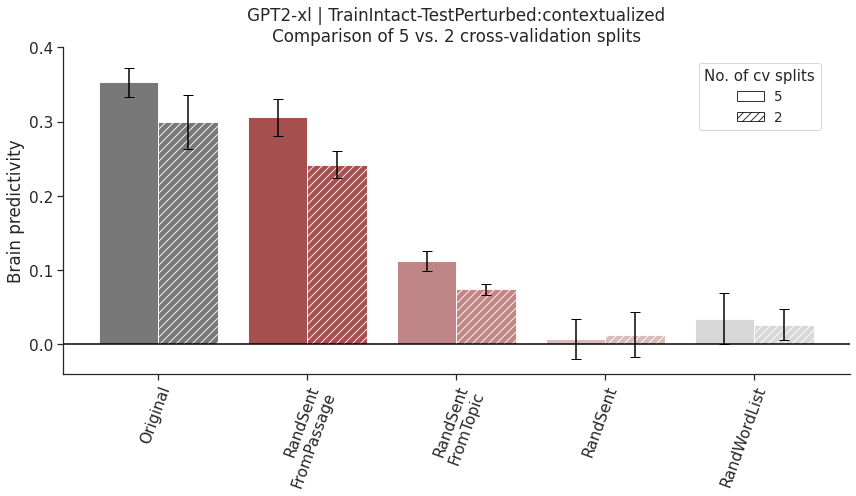

In [12]:
num_bars = 3
nrows = 1

fig2 = plt.figure(constrained_layout=True, figsize=(12, 7), facecolor='white')
spec2 = GridSpec(ncols=1, nrows=nrows, figure=fig2)
f2_ax = []

f2_ax.append(fig2.add_subplot(spec2[0, 0]))

# grouped barplot with error bars

width = 0.4
for ind, df in enumerate([scores_df_5, scores_df_2]):
    x_pos = np.arange(len(df))
    scores = list(df['score'])
    errors = list(df['error'])
    conditions = list(df['condition'])
    categories = list(df['category'])
    cvs = list(df['nr. of splits'])
    hatches = [CV2HATCH[elm] for elm in cvs]

    # plot data in grouped manner of bar type
    if ind == 0:
        x_pos = x_pos - width/2
        alpha = 0.9
    else:
        x_pos = x_pos + width/2
        alpha = 0.9 #could be different here
        
    f2_ax[-1].bar(x_pos, scores,
    yerr=errors,
    align='center',
    alpha=alpha, #color intensity
    ecolor='black',
    capsize=5, #error-bar width
    color=colors,
    hatch=hatches,
    width=width)
    
    
#for plotting setup
full_df = pd.concat([scores_df_5, scores_df_2])
x_pos = np.arange(len(full_df))
conditions = list(full_df['condition'])
categories = list(full_df['category'])
cvs = list(full_df['nr. of splits'])
hatches = [CV2HATCH[elm] for elm in cvs]

#reference_df = full_df.loc[full_df["cross-validation"]=="by-sentence"]
#add horizontal lines for original and random-wl
#orig_score = reference_df[reference_df["condition"]=="Original"]["score"].item()
#f2_ax[-1].axhline(y=orig_score, color="lightgray", linestyle=':', dashes=(5, 3), linewidth=1)

f2_ax[-1].axhline(y=0, color="black")

# create the rectangles for the legend
from matplotlib.patches import Patch
# add legend
hatchmap = dict(zip(cvs, hatches))
hatchmap = {k: v for k, v in hatchmap.items()}
patches2 = [Patch(edgecolor="black", facecolor="white", hatch=v, label=k, alpha=0.8) for k, v in hatchmap.items()]
f2_ax[-1].legend(title=f'No. of cv splits', labels=hatchmap.keys(), handles=patches2,
                 bbox_to_anchor=(0.8, 0.85),
             loc='center left', title_fontsize=15, prop={'size': 13.5}) 

# TICKS
## to get current ones: f2_ax[-1].get_yticks()
yticks = [0, 0.1, 0.2, 0.3, 0.4]
f2_ax[-1].set_yticks(yticks)
#set yticks
f2_ax[-1].set_xticks(list(range(len(df))))
xticknames = ["\nFrom".join(elm.split("From")) for elm in list(scores_df_5["condition"])]
f2_ax[-1].set_xticklabels([x for x in xticknames if x], rotation=70, ha="right", rotation_mode="anchor")

f2_ax[-1].set_ylabel('Brain predictivity')
f2_ax[-1].set_title(f'GPT2-xl | {approach}\nComparison of 5 vs. 2 cross-validation splits')

plt.tight_layout()
plt.savefig(f'{savedir}/{approach}_SemanticDistance-2vs5Splits.png', dpi=180, bbox_inches='tight')
plt.savefig(f'{savedir}/{approach}_SemanticDistance-2vs5Splits.svg', dpi=180)
plt.show()